In [1]:
from rdkit import Chem
import rdkit.Chem.Lipinski as Lipinski
import rdkit.Chem.Crippen as Crippen
import pandas as pd
import numpy as np
import MDAnalysis as mda

In [5]:
mol = Chem.rdmolfiles.MolFromMol2File("../../dataset/refined-set/1a1e/1a1e_ligand.mol2")

In [6]:
#Hydrogen bond donors and acceptors in ligand https://www.rdkit.org/docs/source/rdkit.Chem.Lipinski.html
L_A = Lipinski.NumHAcceptors(mol)
L_D = Lipinski.NumHDonors(mol)

In [7]:
print(L_A)
print(L_D)

9
2


In [8]:
#Octanol-water logP https://www.rdkit.org/docs/source/rdkit.Chem.Crippen.html
LogP = Crippen.MolLogP(mol) 

In [9]:
print(LogP)

0.4552000000000014


In [10]:
#Molar Refractivity https://www.rdkit.org/docs/source/rdkit.Chem.Crippen.html
MR = Crippen.MolMR(mol)

In [11]:
print(MR)

131.67240000000004


In [12]:
#Wiener index http://www.scfbio-iitd.res.in/software/drugdesign/WINDEX/wienerindex.htm
def wiener_index(m):
    res = 0
    amat = Chem.GetDistanceMatrix(m)
    for i in range(m.GetNumAtoms()):
        for j in range(i+1,m.GetNumAtoms()):
            res += amat[i][j]
    return res

In [13]:
#Wiener index for the ligand
wmol = wiener_index(mol)
print(wmol)


5169.0


In [14]:
#Molecular weight of the ligand https://www.rdkit.org/docs/source/rdkit.Chem.rdMolDescriptors.html
MW = Chem.rdMolDescriptors.CalcExactMolWt(mol)
MW

552.2116399099099

In [116]:
#Calculate for all the ligands
indices = pd.read_csv("../../dataset/index_clean", delimiter=',',header=None, comment='#')

In [17]:
indices[0].values

array(['2tpi', '4tln', '1rnt', ..., '6k04', '6ic2', '6gxe'], dtype=object)

In [18]:
def wiener_index(m):
    res = 0
    amat = Chem.GetDistanceMatrix(m)
    for i in range(m.GetNumAtoms()):
        for j in range(i+1,m.GetNumAtoms()):
            res += amat[i][j]
    return res

In [ ]:
arr = np.zeros((len(indices[0]), 6))
for j,i in enumerate(indices[0]):
    #load sdf file
    #ignore errors
    try:
        mol = Chem.rdmolfiles.SDMolSupplier(f"../../dataset/refined-set/{i}/{i}_ligand.sdf")[0]
        MWe = Chem.rdMolDescriptors.CalcExactMolWt(mol)
        L_A = Lipinski.NumHAcceptors(mol)
        L_D = Lipinski.NumHDonors(mol)
        LogP = Crippen.MolLogP(mol) 
        MR = Crippen.MolMR(mol)
        wmol = wiener_index(mol)

    except:
        mol = Chem.rdmolfiles.MolFromMol2File(f"../../dataset/refined-set/{i}/{i}_ligand.mol2")  
        print("mol2")      
        MWe = Chem.rdMolDescriptors.CalcExactMolWt(mol)
        L_A = Lipinski.NumHAcceptors(mol)
        L_D = Lipinski.NumHDonors(mol)
        LogP = Crippen.MolLogP(mol) 
        MR = Crippen.MolMR(mol)
        wmol = wiener_index(mol)
    arr[j] = [MWe, L_A, L_D, LogP, MR, wmol]
  
    

In [20]:
arr

array([[ 2.31170319e+02,  2.00000000e+00,  3.00000000e+00,
        -1.31600000e-01,  6.05356000e+01,  4.61000000e+02],
       [ 1.47112804e+02,  2.00000000e+00,  3.00000000e+00,
        -8.51600000e-01,  3.60603000e+01,  1.30000000e+02],
       [ 3.63057999e+02,  1.00000000e+01,  6.00000000e+00,
        -2.56970000e+00,  7.64808000e+01,  1.23000000e+03],
       ...,
       [ 4.04151622e+02,  6.00000000e+00,  1.00000000e+00,
         4.72902000e+00,  1.14434700e+02,  2.13400000e+03],
       [ 4.36991713e+02,  8.00000000e+00,  5.00000000e+00,
         4.24100000e-01,  8.99438000e+01,  1.70100000e+03],
       [ 3.07062677e+02,  4.00000000e+00,  4.00000000e+00,
         1.68360000e+00,  7.85634000e+01,  1.08800000e+03]])

In [21]:
indices.shape

(5316, 3)

In [22]:
df = pd.DataFrame(arr, columns=['Molecular weight', 'Acceptors', 'Donors', 'LogP', 'Molecular Refractivity', 'Wiener index'])

In [23]:
df['Ids'] = indices[0]

In [24]:
df['Molecular weight'].value_counts()

Molecular weight
427.029415    36
547.235222    23
506.995745    20
441.008679    20
385.128865    17
              ..
269.124431     1
504.159139     1
135.079647     1
155.021858     1
307.062677     1
Name: count, Length: 3878, dtype: int64

In [25]:
df

,Molecular weight,Acceptors,Donors,LogP,Molecular Refractivity,Wiener index,Ids
0,231.170319,2.0,3.0,-0.13160,60.5356,461.0,2tpi
1,147.112804,2.0,3.0,-0.85160,36.0603,130.0,4tln
2,363.057999,10.0,6.0,-2.56970,76.4808,1230.0,1rnt
3,182.081170,2.0,3.0,-0.37020,46.1227,268.0,4ts1
4,519.213437,5.0,5.0,3.26060,135.1412,4249.0,4tmn
...,...,...,...,...,...,...,...
5311,253.050394,3.0,2.0,1.21620,64.9371,478.0,6d1i
5312,212.025563,3.0,1.0,0.53470,50.5625,260.0,6uh0
5313,404.151622,6.0,1.0,4.72902,114.4347,2134.0,6k04
5314,436.991713,8.0,5.0,0.42410,89.9438,1701.0,6ic2


In [7]:
import MDAnalysis as mda

ModuleNotFoundError: No module named 'MDAnalysis'

In [28]:
protein = mda.Universe(f"../../dataset/refined-set/1a1e/1a1e_protein.pdb")

In [29]:
ligand = mda.Universe(f"../../dataset/refined-set/1a1e/1a1e_ligand.mol2")

In [30]:
ligand.atoms[0]

<Atom 1: C of type C.2 of resname ACE, resid 1 and segid SYSTEM>

In [31]:
complex = mda.Merge(protein.atoms, ligand.atoms)

In [32]:
ligname = ligand.residues[0].resname

In [33]:
pocket = complex.select_atoms(f"protein and around 6 resname {ligname}")

In [34]:
#Hydrogen bond donors an acceptors in protein https://www.imgt.org/IMGTeducation/Aide-memoire/_UK/aminoacids/charge/#:~:text=3%20amino%20acids%20(arginine%2C%20lysine,atoms%20in%20their%20side%20chain

In [35]:
#Select the hydrogen bond donors of arginine:

ARG_hbond = pocket.select_atoms("name NH1 NH2 NE")

In [36]:
#Select the hydrongen bond donors of the aminoacid groups as in the paper:

PD_amide = len(pocket.select_atoms("name N"))


In [37]:
#donors
PD_positive = len(pocket.select_atoms("name NZ NE NH1 NH2 ND1 NE2"))        #Lysine, arginine and histidine
PD_neutral = len(pocket.select_atoms("name ND2 NE2"))     #asparagine,glutamine
PD_heteroatom = len(pocket.select_atoms("name NE1"))    #Tryptophan
PD_OH = len(pocket.select_atoms("name OG OG1 OH"))    #Serine, Threonine, Tyrosine

In [38]:
#acceptors
PA_amide = len(pocket.select_atoms("name O"))
PA_negative = len(pocket.select_atoms("name OD1 OD2 OE1 OE2"))   #Aspartate, Glutamate
PA_neutral = len(pocket.select_atoms("name OE1 OG2 OH OD1"))       #Asparagine, Glutamine, tyrosine, serine
PA_aromatic = len(pocket.select_atoms("name OH ND1 NE2"))   #Tyrosine, Histidine

In [6]:
#Construct a table with the logP and MR of every amino acid
amino_acid_names = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL'] # resname 3letter

#List of amino acid SMILES
SMILES_ASP = "C([C@@H](C(=O)O)N)C(=O)O" #aspartate #https://pubchem.ncbi.nlm.nih.gov/compound/Aspartic-Acid
SMILES_ALA = "C[C@@H](C(=O)O)N" #Alanine
SMILES_ARG = "C(C[C@@H](C(=O)O)N)CN=C(N)N" #Arginine
SMILES_ASN = "C([C@@H](C(=O)O)N)C(=O)N" #Asparagine
SMILES_CYS = "C([C@@H](C(=O)O)N)S" #Cysteine
SMILES_GLN = "C(CC(=O)N)[C@@H](C(=O)O)N" #Glutamine
SMILES_GLU = "C(CC(=O)O)[C@@H](C(=O)O)N" #Glutamate
SMILES_GLY = "C(C(=O)O)N" #Glycine
SMILES_HIS = "C1=C(NC=N1)C[C@@H](C(=O)O)N" #Histidine
SMILES_ILE = "CC[C@H](C)[C@@H](C(=O)O)N" #Isoleucine
SMILES_LEU = "CC(C)C[C@@H](C(=O)O)N" #Leucine
SMILES_LYS = "C(CCN)C[C@@H](C(=O)O)N" #Lysine
SMILES_MET = "CSCC[C@@H](C(=O)O)N" #Methionine
SMILES_PHE = "C1=CC=C(C=C1)C[C@@H](C(=O)O)N" #Phenylalanine
SMILES_PRO = "C1C[C@H](NC1)C(=O)O" #Proline
SMILES_SER = "C([C@@H](C(=O)O)N)O" #Serine
SMILES_THR = "C[C@H]([C@@H](C(=O)O)N)O" #Threonine
SMILES_TRP = "C1=CC=C2C(=C1)C(=CN2)C[C@@H](C(=O)O)N" #Tryptophan
SMILES_TYR = "C1=CC(=CC=C1C[C@@H](C(=O)O)N)O" #Tyrosine
SMILES_VAL = "CC(C)[C@@H](C(=O)O)N" #Valine


#Mol object from SMILES
aspartic_mol = Chem.MolFromSmiles(SMILES_ASP) 
alanine_mol = Chem.MolFromSmiles(SMILES_ALA)
arginine_mol = Chem.MolFromSmiles(SMILES_ARG)
asparagine_mol = Chem.MolFromSmiles(SMILES_ASN)
cysteine_mol = Chem.MolFromSmiles(SMILES_CYS)
glutamine_mol = Chem.MolFromSmiles(SMILES_GLN)
glutamate_mol = Chem.MolFromSmiles(SMILES_GLU)
glycine_mol = Chem.MolFromSmiles(SMILES_GLY)
histidine_mol = Chem.MolFromSmiles(SMILES_HIS)
isoleucine_mol = Chem.MolFromSmiles(SMILES_ILE)
leucine_mol = Chem.MolFromSmiles(SMILES_LEU)
lysine_mol = Chem.MolFromSmiles(SMILES_LYS)
methionine_mol = Chem.MolFromSmiles(SMILES_MET)
phenylalanine_mol = Chem.MolFromSmiles(SMILES_PHE)
proline_mol = Chem.MolFromSmiles(SMILES_PRO)
serine_mol = Chem.MolFromSmiles(SMILES_SER)
threonine_mol = Chem.MolFromSmiles(SMILES_THR)
tryptophan_mol = Chem.MolFromSmiles(SMILES_TRP)
tyrosine_mol = Chem.MolFromSmiles(SMILES_TYR)
valine_mol = Chem.MolFromSmiles(SMILES_VAL)


NameError: name 'Chem' is not defined

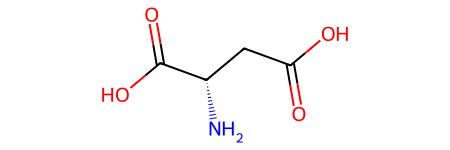

In [41]:
aspartic_mol # You can use this object to calculate the logP and MR of the amino acid

In [70]:

#Look up the smiles for every amino acid and calculate the logP and MR  and make a dictionary

#LogP
log_P_dict = {}
MR_dict = {}
logP_asp = Crippen.MolLogP(aspartic_mol)
logP_ala = Crippen.MolLogP(alanine_mol)
logP_arg = Crippen.MolLogP(arginine_mol)
logP_asn = Crippen.MolLogP(asparagine_mol)
logP_cys = Crippen.MolLogP(cysteine_mol)
logP_gln = Crippen.MolLogP(glutamine_mol)
logP_glu = Crippen.MolLogP(glutamate_mol)
logP_gly = Crippen.MolLogP(glycine_mol)
logP_his = Crippen.MolLogP(histidine_mol)
logP_ile = Crippen.MolLogP(isoleucine_mol)
logP_leu = Crippen.MolLogP(leucine_mol)
logP_lys = Crippen.MolLogP(lysine_mol)
logP_met = Crippen.MolLogP(methionine_mol)
logP_phe = Crippen.MolLogP(phenylalanine_mol)
logP_pro = Crippen.MolLogP(proline_mol)
logP_ser = Crippen.MolLogP(serine_mol)
logP_thr = Crippen.MolLogP(threonine_mol)
logP_trp = Crippen.MolLogP(tryptophan_mol)
logP_tyr = Crippen.MolLogP(tyrosine_mol)
logP_val = Crippen.MolLogP(valine_mol)

#MR
MR_asp = Crippen.MolMR(aspartic_mol)
MR_ala = Crippen.MolMR(alanine_mol)
MR_arg = Crippen.MolMR(arginine_mol)
MR_asn = Crippen.MolMR(asparagine_mol)
MR_cys = Crippen.MolMR(cysteine_mol)
MR_gln = Crippen.MolMR(glutamine_mol)
MR_glu = Crippen.MolMR(glutamate_mol)
MR_gly = Crippen.MolMR(glycine_mol)
MR_his = Crippen.MolMR(histidine_mol)
MR_ile = Crippen.MolMR(isoleucine_mol)
MR_leu = Crippen.MolMR(leucine_mol)
MR_lys = Crippen.MolMR(lysine_mol)
MR_met = Crippen.MolMR(methionine_mol)
MR_phe = Crippen.MolMR(phenylalanine_mol)
MR_pro = Crippen.MolMR(proline_mol)
MR_ser = Crippen.MolMR(serine_mol)
MR_thr = Crippen.MolMR(threonine_mol)
MR_trp = Crippen.MolMR(tryptophan_mol)
MR_tyr = Crippen.MolMR(tyrosine_mol)
MR_val = Crippen.MolMR(valine_mol)


log_P_dict['ASP'] = logP_asp
log_P_dict['ALA'] = logP_ala
log_P_dict['ARG'] = logP_arg
log_P_dict['ASN'] = logP_asn
log_P_dict['CYS'] = logP_cys
log_P_dict['GLN'] = logP_gln
log_P_dict['GLU'] = logP_glu
log_P_dict['GLY'] = logP_gly
log_P_dict['HIS'] = logP_his
log_P_dict['ILE'] = logP_ile
log_P_dict['LEU'] = logP_leu
log_P_dict['LYS'] = logP_lys
log_P_dict['MET'] = logP_met
log_P_dict['PHE'] = logP_phe
log_P_dict['PRO'] = logP_pro
log_P_dict['SER'] = logP_ser
log_P_dict['THR'] = logP_thr
log_P_dict['TRP'] = logP_trp
log_P_dict['TYR'] = logP_tyr
log_P_dict['VAL'] = logP_val

MR_dict['ASP'] = MR_asp
MR_dict['ALA'] = MR_ala
MR_dict['ARG'] = MR_arg
MR_dict['ASN'] = MR_asn
MR_dict['CYS'] = MR_cys
MR_dict['GLN'] = MR_gln
MR_dict['GLU'] = MR_glu
MR_dict['GLY'] = MR_gly
MR_dict['HIS'] = MR_his
MR_dict['ILE'] = MR_ile
MR_dict['LEU'] = MR_leu
MR_dict['LYS'] = MR_lys
MR_dict['MET'] = MR_met
MR_dict['PHE'] = MR_phe
MR_dict['PRO'] = MR_pro
MR_dict['SER'] = MR_ser
MR_dict['THR'] = MR_thr
MR_dict['TRP'] = MR_trp
MR_dict['TYR'] = MR_tyr
MR_dict['VAL'] = MR_val


In [ ]:
#Make a dictionary of the amino acids with their smiles
smiles_dict = {
    "ASP": "C([C@@H](C(=O)O)N)C(=O)O",
    "GLU": "C(CC(=O)O)[C@@H](C(=O)O)N",
    "LYS": "C(CCN)C[C@@H](C(=O)O)N",
    "ARG": "C(C[C@@H](C(=O)O)N)CN=C(N)N",
    "HIS": "C1=C(NC=N1)C[C@@H](C(=O)O)N",
    "SER": "C([C@@H](C(=O)O)N)O",
    "THR": "C[C@H]([C@@H](C(=O)O)N)O",
    "ASN": "C([C@@H](C(=O)O)N)C(=O)N",
    "GLN": "C(CC(=O)N)[C@@H](C(=O)O)N",
    "CYS": "C([C@@H](C(=O)O)N)S",
    "MET": "CSCC[C@@H](C(=O)O)N",
    "TYR": "C1=CC(=CC=C1C[C@@H](C(=O)O)N)O",
    "TRP": "C1=CC=C2C(=C1)C(=CN2)C[C@@H](C(=O)O)N",
    "PHE": "C1=CC=C(C=C1)C[C@@H](C(=O)O)N",
    "GLY": "C(C(=O)O)N",
    "PRO": "C1C[C@H](NC1)C(=O)O",
    "ALA": "C[C@@H](C(=O)O)N",
    "VAL": "CC(C)[C@@H](C(=O)O)N",
    "LEU": "CC(C)C[C@@H](C(=O)O)N",
    "ILE": "CC[C@H](C)[C@@H](C(=O)O)N"
}

In [44]:
log_P_dict

{'ASP': -1.1269999999999998,
 'ALA': -0.5817999999999999,
 'ARG': -1.548099999999999,
 'ASN': -1.7262999999999993,
 'CYS': -0.6719,
 'GLN': -1.336199999999999,
 'GLU': -0.736899999999999,
 'GLY': -0.9702999999999999,
 'HIS': -0.6358999999999995,
 'ILE': 0.44439999999999996,
 'LEU': 0.44439999999999996,
 'LYS': -0.47269999999999873,
 'MET': 0.15140000000000003,
 'PHE': 0.641,
 'PRO': -0.17700000000000032,
 'SER': -1.6093999999999995,
 'THR': -1.2208999999999997,
 'TRP': 1.1222999999999996,
 'TYR': 0.3465999999999994,
 'VAL': 0.05430000000000007}

In [45]:
MR_dict

{'ASP': 27.863999999999997,
 'ALA': 21.285200000000003,
 'ARG': 45.522,
 'ASN': 29.422600000000003,
 'CYS': 29.464199999999998,
 'GLN': 34.03959999999999,
 'GLU': 32.480999999999995,
 'GLY': 16.6902,
 'HIS': 37.902899999999995,
 'ILE': 35.06619999999998,
 'LEU': 35.06619999999998,
 'LYS': 38.5166,
 'MET': 38.61019999999999,
 'PHE': 45.75720000000001,
 'PRO': 28.660499999999992,
 'SER': 22.697000000000003,
 'THR': 27.291999999999994,
 'TRP': 57.613900000000015,
 'TYR': 47.42200000000001,
 'VAL': 30.44919999999999}

In [73]:
amino_acid_names_list = ['ALA', 'ARG', 'ASN', 'ASP', 'CYS', 'GLN', 'GLU', 'GLY', 'HIS', 'ILE', 'LEU', 'LYS', 'MET', 'PHE', 'PRO', 'SER', 'THR', 'TRP', 'TYR', 'VAL']

In [ ]:
arr = np.zeros((len(indices[0]), 11))
for j,i in enumerate(indices[0]):
    protein = mda.Universe(f"../../dataset/refined-set/{i}/{i}_protein.pdb")
    ligand = mda.Universe(f"../../dataset/refined-set/{i}/{i}_ligand.mol2")

    ligname = 'LIG'
    for lgnm in ligand.residues:
        lgnm.resname = 'LIG'
    complex = mda.Merge(protein.atoms, ligand.atoms)
    pocket = complex.select_atoms(f"protein and around 6 resname {ligname}")
    PD_amide = len(pocket.select_atoms("name N"))
    PD_positive = len(pocket.select_atoms("name NZ NE NH1 NH2 ND1 NE2"))        #Lysine, arginine and histidine
    PD_neutral = len(pocket.select_atoms("name ND2 NE2"))     #asparagine,glutamine
    PD_heteroatom = len(pocket.select_atoms("name NE1"))    #Tryptophan
    PD_OH = len(pocket.select_atoms("name OG OG1 OH"))    #Serine, Threonine, Tyrosine
    PA_amide = len(pocket.select_atoms("name O"))
    PA_negative = len(pocket.select_atoms("name OD1 OD2 OE1 OE2"))   #Aspartate, Glutamate
    PA_neutral = len(pocket.select_atoms("name OE1 OG2 OH OD1"))       #Asparagine, Glutamine, tyrosine, serine
    PA_aromatic = len(pocket.select_atoms("name OH ND1 NE2"))   #Tyrosine, Histidine
    amino_acids = [residue.resname for residue in pocket.residues]
    P_logp = np.mean([log_P_dict[amino_acid] for amino_acid in amino_acids])
    P_MR = np.mean([MR_dict[amino_acid] for amino_acid in amino_acids])
    arr[j] = [PD_amide, PD_positive, PD_neutral, PD_heteroatom, PD_OH, PA_amide, PA_negative, PA_neutral, PA_aromatic, P_logp, P_MR]
    print(arr[j])
    


In [165]:
df['PD_amide'] = arr[:,0]
df['PD_positive'] = arr[:,1]
df['PD_neutral'] = arr[:,2]
df['PD_heteroatom'] = arr[:,3]
df['PD_OH'] = arr[:,4]
df['PA_amide'] = arr[:,5]
df['PA_negative'] = arr[:,6]
df['PA_neutral'] = arr[:,7]
df['PA_aromatic'] = arr[:,8]
df['P_logp'] = arr[:,9]
df['P_MR'] = arr[:,10]


In [166]:
df

,Molecular weight,Acceptors,Donors,LogP,Molecular Refractivity,Wiener index,Ids,PD_amide,PD_positive,PD_neutral,PD_heteroatom,PD_OH,PA_amide,PA_negative,PA_neutral,PA_aromatic,Free energy,P_logp,P_MR
0,231.170319,2.0,3.0,-0.13160,60.5356,461.0,2tpi,24.0,0.0,0.0,0.0,5.0,23.0,5.0,4.0,1.0,-5.874825,-0.665612,29.440791
1,147.112804,2.0,3.0,-0.85160,36.0603,130.0,4tln,6.0,9.0,4.0,0.0,2.0,6.0,6.0,4.0,7.0,-5.072544,-0.403714,34.962933
2,363.057999,10.0,6.0,-2.56970,76.4808,1230.0,1rnt,9.0,6.0,6.0,0.0,3.0,9.0,9.0,10.0,7.0,-7.070675,-0.619947,36.111405
3,182.081170,2.0,3.0,-0.37020,46.1227,268.0,4ts1,11.0,4.0,5.0,1.0,4.0,12.0,11.0,10.0,5.0,-6.727787,-0.498970,31.695033
4,519.213437,5.0,5.0,3.26060,135.1412,4249.0,4tmn,16.0,9.0,5.0,1.0,6.0,16.0,13.0,10.0,9.0,-13.859616,-0.503965,34.127585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5311,253.050394,3.0,2.0,1.21620,64.9371,478.0,6d1i,6.0,9.0,5.0,0.0,0.0,5.0,4.0,2.0,8.0,-5.577268,-0.570889,33.634874
5312,212.025563,3.0,1.0,0.53470,50.5625,260.0,6uh0,5.0,7.0,6.0,1.0,3.0,6.0,5.0,5.0,8.0,-8.272838,-0.393956,34.876296
5313,404.151622,6.0,1.0,4.72902,114.4347,2134.0,6k04,10.0,2.0,2.0,1.0,2.0,9.0,3.0,4.0,4.0,-10.960875,-0.186890,36.583310
5314,436.991713,8.0,5.0,0.42410,89.9438,1701.0,6ic2,8.0,7.0,6.0,1.0,3.0,10.0,4.0,4.0,8.0,-8.229820,-0.330392,33.531504


In [139]:
#Separate the number from str in indices[2] and assign to number and unit columns respectively
indices['number'] = [var[:-2] for var in indices[2]]
indices['unit'] = [var[-2:] for var in indices[2]]

In [140]:
indices

,0,1,2,number,unit
0,2tpi,Kd,49uM,49,uM
1,4tln,Ki,190uM,190,uM
2,1rnt,Kd,6.5uM,6.5,uM
3,4ts1,Kd,11.6uM,11.6,uM
4,4tmn,Ki,0.068nM,0.068,nM
...,...,...,...,...,...
5311,6d1i,Ki,81uM,81,uM
5312,6uh0,Ki,853.1nM,853.1,nM
5313,6k04,Ki,9.1nM,9.1,nM
5314,6ic2,Ki,917.4nM,917.4,nM


In [141]:
indices['unit'].value_counts()

unit
uM    2672
nM    2225
mM     286
pM     132
fM       1
Name: count, dtype: int64

In [145]:
#Create empty molar column
indices['Molar'] = np.nan


In [ ]:
#Convert the number to molar according to the unit
indices['number'] = indices['number'].astype(float)
indices['unit'] = indices['unit'].astype(str)
for i in range(len(indices)):
    if indices['unit'][i] == 'mM':
        indices['Molar'][i] = indices['number'][i]/1000
    elif indices['unit'][i] == 'nM':
        indices['Molar'][i] = indices['number'][i]/1000000000
    elif indices['unit'][i] == 'uM':
        indices['Molar'][i] = indices['number'][i]/1000000
    elif indices['unit'][i] == 'pM':
        indices['Molar'][i] = indices['number'][i]/1000000000000
    elif indices['unit'][i] == 'fM':
        indices['Molar'][i] = indices['number'][i]/1000000000000000
    else:
        indices['number'][i] = indices['number'][i]

In [148]:
#Convert the Molar to free energy in kcal/mol
indices['Molar'] = indices['Molar'].astype(float)
indices['Free energy'] = 0.592 * np.log(indices['Molar']) #RT = 0.592 kcal/mol at 298K

In [149]:
indices

,0,1,2,number,unit,Molar,Free energy
0,2tpi,Kd,49uM,49.000,uM,4.900000e-05,-5.874825
1,4tln,Ki,190uM,190.000,uM,1.900000e-04,-5.072544
2,1rnt,Kd,6.5uM,6.500,uM,6.500000e-06,-7.070675
3,4ts1,Kd,11.6uM,11.600,uM,1.160000e-05,-6.727787
4,4tmn,Ki,0.068nM,0.068,nM,6.800000e-11,-13.859616
...,...,...,...,...,...,...,...
5311,6d1i,Ki,81uM,81.000,uM,8.100000e-05,-5.577268
5312,6uh0,Ki,853.1nM,853.100,nM,8.531000e-07,-8.272838
5313,6k04,Ki,9.1nM,9.100,nM,9.100000e-09,-10.960875
5314,6ic2,Ki,917.4nM,917.400,nM,9.174000e-07,-8.229820


In [150]:
df['Free energy'] = indices['Free energy']

In [167]:
df

,Molecular weight,Acceptors,Donors,LogP,Molecular Refractivity,Wiener index,Ids,PD_amide,PD_positive,PD_neutral,PD_heteroatom,PD_OH,PA_amide,PA_negative,PA_neutral,PA_aromatic,Free energy,P_logp,P_MR
0,231.170319,2.0,3.0,-0.13160,60.5356,461.0,2tpi,24.0,0.0,0.0,0.0,5.0,23.0,5.0,4.0,1.0,-5.874825,-0.665612,29.440791
1,147.112804,2.0,3.0,-0.85160,36.0603,130.0,4tln,6.0,9.0,4.0,0.0,2.0,6.0,6.0,4.0,7.0,-5.072544,-0.403714,34.962933
2,363.057999,10.0,6.0,-2.56970,76.4808,1230.0,1rnt,9.0,6.0,6.0,0.0,3.0,9.0,9.0,10.0,7.0,-7.070675,-0.619947,36.111405
3,182.081170,2.0,3.0,-0.37020,46.1227,268.0,4ts1,11.0,4.0,5.0,1.0,4.0,12.0,11.0,10.0,5.0,-6.727787,-0.498970,31.695033
4,519.213437,5.0,5.0,3.26060,135.1412,4249.0,4tmn,16.0,9.0,5.0,1.0,6.0,16.0,13.0,10.0,9.0,-13.859616,-0.503965,34.127585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5311,253.050394,3.0,2.0,1.21620,64.9371,478.0,6d1i,6.0,9.0,5.0,0.0,0.0,5.0,4.0,2.0,8.0,-5.577268,-0.570889,33.634874
5312,212.025563,3.0,1.0,0.53470,50.5625,260.0,6uh0,5.0,7.0,6.0,1.0,3.0,6.0,5.0,5.0,8.0,-8.272838,-0.393956,34.876296
5313,404.151622,6.0,1.0,4.72902,114.4347,2134.0,6k04,10.0,2.0,2.0,1.0,2.0,9.0,3.0,4.0,4.0,-10.960875,-0.186890,36.583310
5314,436.991713,8.0,5.0,0.42410,89.9438,1701.0,6ic2,8.0,7.0,6.0,1.0,3.0,10.0,4.0,4.0,8.0,-8.229820,-0.330392,33.531504


In [2]:
df.to_csv("features.csv", index=False)

NameError: name 'df' is not defined

In [1]:
#Put your imports here so you don't have to re run the whole script
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.svm import SVR
import seaborn as sns
import sklearn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRegressor
import matplotlib.pyplot as plt

# sudo pip install xgboost
import xgboost

warnings.filterwarnings('ignore')

In [3]:
df

NameError: name 'df' is not defined

In [2]:
#Try implementing SVM (https://medium.com/@niousha.rf/support-vector-regressor-theory-and-coding-exercise-in-python-ca6a7dfda927), LR (https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/), RF (https://www.geeksforgeeks.org/random-forest-regression-in-python/), and XGBoost (https://machinelearningmastery.com/xgboost-for-regression/)
#You can load the calculated features with df = pd.read_csv("features.csv") and then use the features to train the models
#The target will be the Free energy column, the rest will be the features
#reduces overfitting

df = pd.read_csv("features.csv")

X = df.drop(['Free energy', 'Ids'], axis=1)
Y = df['Free energy']
x_scaled = StandardScaler().fit_transform(X)
y_scaled = StandardScaler().fit_transform(Y.values.reshape(-1,1)).flatten()
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.3, random_state=0)





In [3]:
svm_preds = {}

#Scales X-data, fit() method expects a 2D array-like input


svr_lin = SVR(kernel = 'linear')
svr_rbf = SVR(kernel = 'rbf')
svr_poly = SVR(kernel = 'poly')

svr_lin.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)

svm_preds['linear_svr_pred'] = svr_lin.predict(X_test)
svm_preds['rbf_svr_pred'] = svr_rbf.predict(X_test)
svm_preds['poly_svr_pred'] = svr_poly.predict(X_test)


In [4]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import r2_score

print("Linear SVR")
print('Mean Squared Error:', mean_squared_error(y_test, svm_preds['linear_svr_pred']))
print('R2 Score:', r2_score(y_test, svm_preds['linear_svr_pred']))
print("\n")
print("RBF SVR")
print('Mean Squared Error:', mean_squared_error(y_test, svm_preds['rbf_svr_pred']))
print('R2 Score:', r2_score(y_test, svm_preds['rbf_svr_pred']))
print("\n")
print("Poly SVR")
print('Mean Squared Error:', mean_squared_error(y_test, svm_preds['poly_svr_pred']))
print('R2 Score:', r2_score(y_test, svm_preds['poly_svr_pred']))


Linear SVR
Mean Squared Error: 0.6626442052033897
R2 Score: 0.3455708615517843


RBF SVR
Mean Squared Error: 0.5146196576773254
R2 Score: 0.491760289220492


Poly SVR
Mean Squared Error: 0.6793096112285816
R2 Score: 0.32911206326861153


Text(0, 0.5, 'Predicted Free energy')

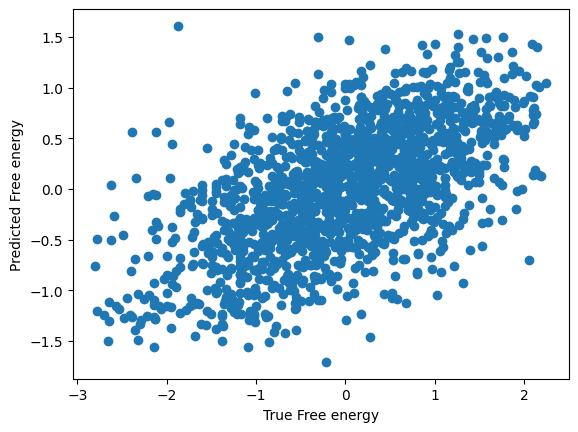

In [5]:
plt.plot(y_test, svm_preds['linear_svr_pred'], 'o')
plt.xlabel('True Free energy')
plt.ylabel('Predicted Free energy')

Text(0, 0.5, 'Predicted Free energy')

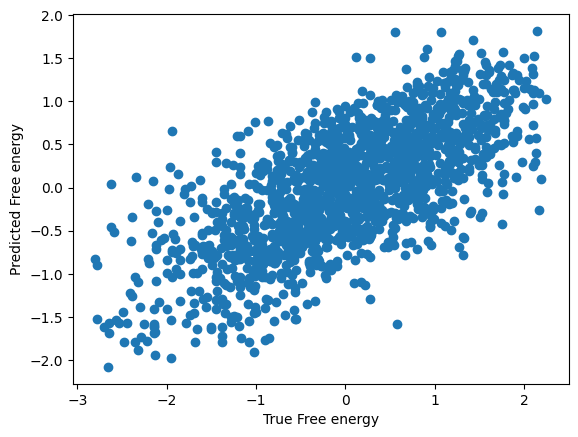

In [6]:
plt.plot(y_test, svm_preds['rbf_svr_pred'], 'o')
plt.xlabel('True Free energy')
plt.ylabel('Predicted Free energy')

Text(0, 0.5, 'Predicted Free energy')

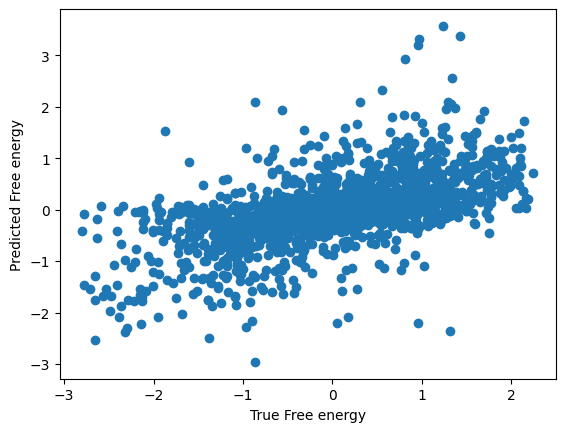

In [7]:
plt.plot(y_test, svm_preds['poly_svr_pred'], 'o')
plt.xlabel('True Free energy')
plt.ylabel('Predicted Free energy')

In [8]:
#Try implementing LR (https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/), 
#You can load the calculated features with df = pd.read_csv("features.csv") and then use the features to train the models
#The target will be the Free energy column, the rest will be the features
'''
df = pd.read_csv("features.csv")

X = df.drop(['Free energy', 'Ids'], axis=1)
Y = df['Free energy']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

X_train = np.array(X_train)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test)
y_test = np.array(y_test)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''

logit = LinearRegression()
logit.fit(X_train, y_train)
y_test_pred = logit.predict(X_test)

np.mean(y_test_pred == y_test)

0.0

In [9]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('R2 Score:', metrics.r2_score(y_test, y_test_pred))

Mean Squared Error: 0.6620430864334105
R2 Score: 0.34616452801057696


Text(0, 0.5, 'Predicted Free energy')

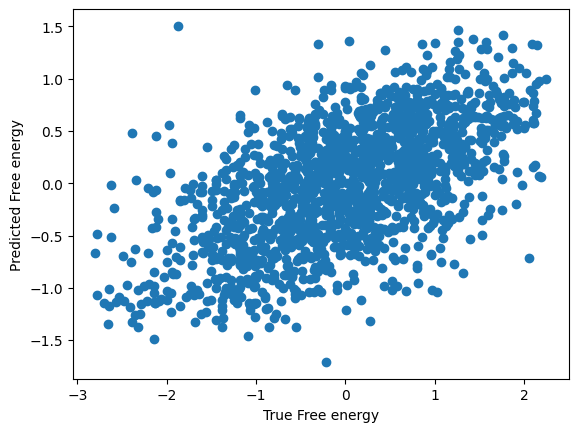

In [10]:
plt.plot(y_test, y_test_pred, 'o')
plt.xlabel('True Free energy')
plt.ylabel('Predicted Free energy')

In [11]:
#Try implementing, RF (https://www.geeksforgeeks.org/random-forest-regression-in-python/) 
#You can load the calculated features with df = pd.read_csv("features.csv") and then use the features to train the models
#The target will be the Free energy column, the rest will be the features
#combines multiple "trees"
'''
df = pd.read_csv("features.csv")

X = df.drop(['Free energy', 'Ids'], axis=1)
Y = df['Free energy']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
label_encoder = LabelEncoder()
x_categorical = df.select_dtypes(include=['object']).apply(label_encoder.fit_transform)
x_numerical = df.select_dtypes(exclude=['object']).values
x = pd.concat([pd.DataFrame(x_numerical), x_categorical], axis=1).values
'''
# Fitting Random Forest Regression to the dataset
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Fit the regressor with x and y data
regressor.fit(X_train, y_train)

y_test_pred = regressor.predict(X_test)



In [12]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('R2 Score:', metrics.r2_score(y_test, y_test_pred))

Mean Squared Error: 0.5288657269225168
R2 Score: 0.47769083422609926


Text(0, 0.5, 'Predicted Free energy')

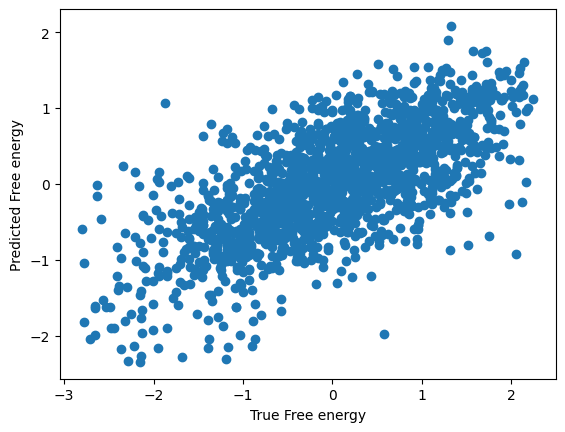

In [13]:
plt.plot(y_test, y_test_pred, 'o')
plt.xlabel('True Free energy')
plt.ylabel('Predicted Free energy')

In [14]:
#Try implementing XGBoost (https://machinelearningmastery.com/xgboost-for-regression/)
#You can load the calculated features with df = pd.read_csv("features.csv") and then use the features to train the models
#The target will be the Free energy column, the rest will be the features
'''

df = pd.read_csv("features.csv")
X_test, X_train, y_test, y_train = train_test_split(df.drop(['Free energy', 'Ids'], axis=1), df['Free energy'], test_size=0.3, random_state=0)
scaler = StandardScaler()   
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
'''
model = XGBRegressor()
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)






In [15]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('R2 Score:', metrics.r2_score(y_test, y_test_pred))

Mean Squared Error: 0.5278643150534744
R2 Score: 0.4786798311893914


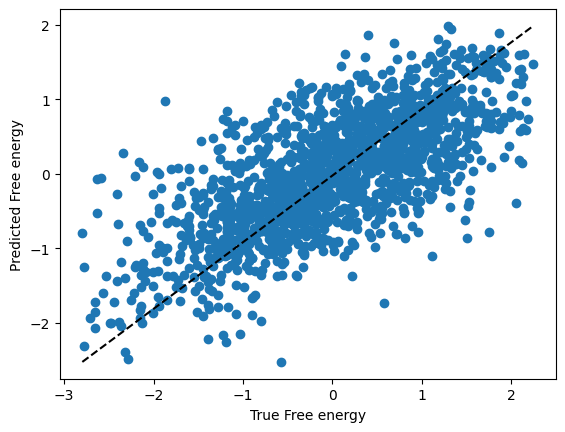

In [16]:

plt.plot(y_test, y_test_pred, 'o')
plt.xlabel('True Free energy')
plt.ylabel('Predicted Free energy')
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_test_pred), np.max(y_test_pred)], 'k--')

In [17]:
from keras.callbacks import ModelCheckpoint, History
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
import tensorflow as tf
tf.config.list_physical_devices('GPU')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

2024-12-20 08:58:28.274663: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-12-20 08:58:28.361726: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-12-20 08:58:28.386538: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-20 08:58:28.553080: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-12-20 08:58:29.854397: W tensorflow/compiler/tf2

In [18]:
df = pd.read_csv("features.csv")
X = df.drop(['Free energy', 'Ids'], axis=1)
Y = df['Free energy']
x_scaled = StandardScaler().fit_transform(X)
y_scaled = StandardScaler().fit_transform(Y.values.reshape(-1,1)).flatten()
X_test, X_train, y_test, y_train = train_test_split(x_scaled, y_scaled, test_size=0.3, random_state=0)

In [19]:
NN_model = Sequential()
#NN_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))
NN_model.add(Dense(600, activation='relu'))
#NN_model.add(Dense(250, activation='relu'))
NN_model.add(Dense(1, activation='linear'))
NN_model.compile(optimizer = "adam", loss = 'mse')

# tf.keras.layers.Dense(300, activation=tf.nn.relu),
# tf.keras.layers.Dense(250, activation=tf.nn.relu),
# tf.keras.layers.Dense(235, activation=tf.nn.relu),
# tf.keras.layers.Dense(200, activation=tf.nn.relu),
# tf.keras.layers.Dense(125, activation=tf.nn.relu),
# tf.keras.layers.Dense(75, activation=tf.nn.relu),



I0000 00:00:1734685114.316982    1108 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1734685114.317061    1108 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1734685114.317092    1108 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1734685117.015748    1108 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
I0000 00:00:1734685117.016821    1108 cuda_executor.cc:1001] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-12-20

In [20]:
history = NN_model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split = 0.2)

Epoch 1/100


I0000 00:00:1734685120.945449    1502 service.cc:146] XLA service 0x7f02a80039f0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1734685120.946156    1502 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-12-20 08:58:41.005328: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-12-20 08:58:46.036019: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-12-20 08:58:46.967668: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:762] The NVIDIA driver's CUDA version is 12.2 which is older than the ptxas CUDA version (12.3.107). Because the driver is older than the ptxas version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward co

31/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9777

I0000 00:00:1734685127.169834    1502 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


40/40 ━━━━━━━━━━━━━━━━━━━━ 8s 30ms/step - loss: 0.9262 - val_loss: 0.5982
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6192 - val_loss: 0.5778
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.5780 - val_loss: 0.5609
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5614 - val_loss: 0.5636
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5398 - val_loss: 0.5625
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5778 - val_loss: 0.5570
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.5584 - val_loss: 0.5706
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.5118 - val_loss: 0.5728
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4711 - val_loss: 0.5899
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4901 - val_loss: 0.6025
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4734 - val_loss: 0.5863
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4684 - val_l

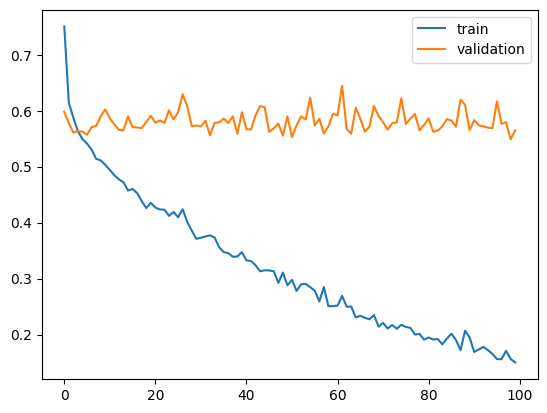

In [21]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

In [22]:
print('Best validation loss:', np.min(history.history['val_loss']), np.argmin(history.history['val_loss']))

Best validation loss: 0.5489804744720459 98


In [23]:
y_test_pred = NN_model.predict(X_test)

117/117 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [24]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('R2 Score:', metrics.r2_score(y_test, y_test_pred))

Mean Squared Error: 0.6264030967174796
R2 Score: 0.3701930678055243


In [ ]:
#keras tuner check this tutorial https://haneulkim.medium.com/hyperparameter-tuning-with-keras-tuner-full-tutorial-f8128397e857

In [10]:
import kerastuner as kt

In [18]:
def build_model(hp):
    num_layers = hp.Int('num_layers', min_value=1, max_value=3, step=1)
    units_per_layer = hp.Int('units_per_layer', min_value=32, max_value=512, step=32)
    dropout_rate = hp.Float('dropout_rate', min_value=0.0, max_value=0.4,step=0.1)
    learning_rate = hp.Choice('learning_rate', values=[1e-3, 1e-4])
    model = Sequential()
    for i in range(num_layers):
        model.add(Dense(units=units_per_layer, activation='relu'))
        model.add(Dropout(dropout_rate))
    model.add(Dense(1, activation='linear'))
    model.compile(optimizer=Adam(learning_rate=learning_rate), loss='mse')
    return model

In [19]:
obj = kt.Objective('val_loss', direction='min')
tuner = kt.RandomSearch(build_model, objective=obj, max_trials=500, executions_per_trial=1,
                               project_name="Hyper tuning", directory="tuning")

Reloading Tuner from tuning/Hyper tuning/tuner0.json


In [21]:
tuner.search(X_train, y_train, epochs=100, validation_split=0.2)

In [22]:
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

In [23]:
print(best_hps.values)

{'num_layers': 3, 'units_per_layer': 192, 'dropout_rate': 0.2, 'learning_rate': 0.001}


In [24]:
best_model = tuner.hypermodel.build(best_hps)

In [37]:
NN_model = Sequential()
NN_model.add(Dense(192, input_dim=X_train.shape[1], activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(192, activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(192, activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(1, activation='linear'))
NN_model.compile(optimizer =Adam(learning_rate=0.0001), loss = 'mse')

In [38]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True),EarlyStopping(monitor='val_loss', patience=10)]

In [39]:
history = NN_model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=callbacks)

Epoch 1/100


40/40 ━━━━━━━━━━━━━━━━━━━━ 3s 40ms/step - loss: 1.0611 - val_loss: 0.7497
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.8486 - val_loss: 0.6242
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.7917 - val_loss: 0.5849
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6982 - val_loss: 0.5658
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7111 - val_loss: 0.5700
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6374 - val_loss: 0.5710
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6342 - val_loss: 0.5643
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.7120 - val_loss: 0.5655
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6502 - val_loss: 0.5611
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.6382 - val_loss: 0.5640
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6347 - val_loss: 0.5608
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.6510 - val_l

Best validation loss: 0.5440691709518433 27


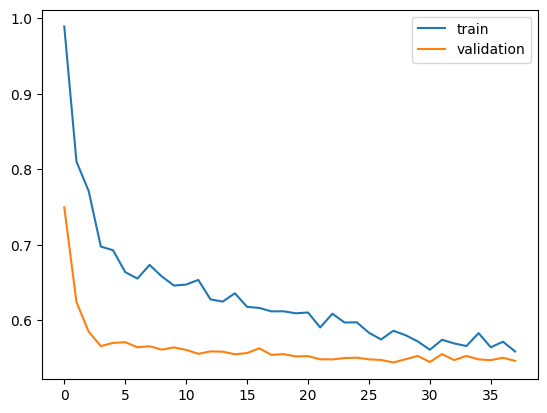

In [40]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
print('Best validation loss:', np.min(history.history['val_loss']), np.argmin(history.history['val_loss']))
plt.legend()
plt.show()

In [41]:
NN_model.load_weights('best_model.keras')

In [42]:
y_pred = NN_model.predict(X_test)

117/117 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [43]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Squared Error: 0.5933854778103518
R2 Score: 0.4033901024007147


# Augmented data

In [44]:
#Put your imports here so you don't have to re run the whole script
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
from matplotlib import pyplot as plt
from sklearn.svm import SVR
import seaborn as sns
import sklearn
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedStratifiedKFold
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
# sudo pip install xgboost
import xgboost

warnings.filterwarnings('ignore')

In [45]:
augmented_data = pd.read_csv("features_aug.csv")

In [46]:
merged_data = pd.concat([df, augmented_data], axis=0)

In [47]:
merged_data.reset_index(drop=True, inplace=True)
merged_data

,Molecular weight,Acceptors,Donors,LogP,Molecular Refractivity,Wiener index,Ids,PD_amide,PD_positive,PD_neutral,PD_heteroatom,PD_OH,PA_amide,PA_negative,PA_neutral,PA_aromatic,Free energy,P_logp,P_MR
0,231.170319,2.0,3.0,-0.13160,60.5356,461.0,2tpi,24.0,0.0,0.0,0.0,5.0,23.0,5.0,4.0,1.0,-5.874825,-0.665612,29.440791
1,147.112804,2.0,3.0,-0.85160,36.0603,130.0,4tln,6.0,9.0,4.0,0.0,2.0,6.0,6.0,4.0,7.0,-5.072544,-0.403714,34.962933
2,363.057999,10.0,6.0,-2.56970,76.4808,1230.0,1rnt,9.0,6.0,6.0,0.0,3.0,9.0,9.0,10.0,7.0,-7.070675,-0.619947,36.111405
3,182.081170,2.0,3.0,-0.37020,46.1227,268.0,4ts1,11.0,4.0,5.0,1.0,4.0,12.0,11.0,10.0,5.0,-6.727787,-0.498970,31.695033
4,519.213437,5.0,5.0,3.26060,135.1412,4249.0,4tmn,16.0,9.0,5.0,1.0,6.0,16.0,13.0,10.0,9.0,-13.859616,-0.503965,34.127585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10627,253.050394,3.0,2.0,1.21620,64.9371,478.0,6d1i,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
10628,212.025563,3.0,1.0,0.53470,50.5625,260.0,6uh0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
10629,404.151622,6.0,1.0,4.72902,114.4347,2134.0,6k04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
10630,436.991713,8.0,5.0,0.42410,89.9438,1701.0,6ic2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [48]:
Y = merged_data['Free energy']
X = merged_data.drop(['Free energy', 'Ids'], axis=1)
x_scaled = StandardScaler().fit_transform(X)
y_scaled = StandardScaler().fit_transform(Y.values.reshape(-1,1)).flatten()
X_train, X_test, y_train, y_test = train_test_split(x_scaled, y_scaled, test_size=0.3, random_state=0)

#Drop the free energy = 0 from the test set
X_test = X_test[y_test < 0.6]
y_test = y_test[y_test < 0.6] 

In [52]:
svm_preds = {}

#Scales X-data, fit() method expects a 2D array-like input


svr_lin = SVR(kernel = 'linear')
svr_rbf = SVR(kernel = 'rbf')
svr_poly = SVR(kernel = 'poly')

svr_lin.fit(X_train, y_train)
svr_rbf.fit(X_train, y_train)
svr_poly.fit(X_train, y_train)

svm_preds['linear_svr_pred'] = svr_lin.predict(X_test)
svm_preds['rbf_svr_pred'] = svr_rbf.predict(X_test)
svm_preds['poly_svr_pred'] = svr_poly.predict(X_test)


In [53]:
print("Linear SVR")
print('Mean Squared Error:', mean_squared_error(y_test, svm_preds['linear_svr_pred']))
print('R2 Score:', r2_score(y_test, svm_preds['linear_svr_pred']))
print("\n")
print("RBF SVR")
print('Mean Squared Error:', mean_squared_error(y_test, svm_preds['rbf_svr_pred']))
print('R2 Score:', r2_score(y_test, svm_preds['rbf_svr_pred']))
print("\n")
print("Poly SVR")
print('Mean Squared Error:', mean_squared_error(y_test, svm_preds['poly_svr_pred']))
print('R2 Score:', r2_score(y_test, svm_preds['poly_svr_pred']))

Linear SVR
Mean Squared Error: 0.22907032512748973
R2 Score: 0.2934960592902378


RBF SVR
Mean Squared Error: 0.1741798107241994
R2 Score: 0.46279064038417594


Poly SVR
Mean Squared Error: 0.24908592148658806
R2 Score: 0.23176349879603741


Text(0, 0.5, 'Predicted Free energy')

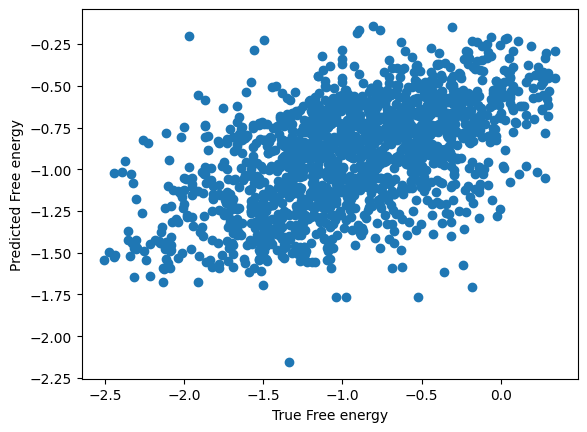

In [54]:
plt.plot(y_test, svm_preds['linear_svr_pred'], 'o')
plt.xlabel('True Free energy')
plt.ylabel('Predicted Free energy')

In [55]:
#Random Forest
regressor = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [56]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Squared Error: 0.16191378590746475
R2 Score: 0.5006217949217342


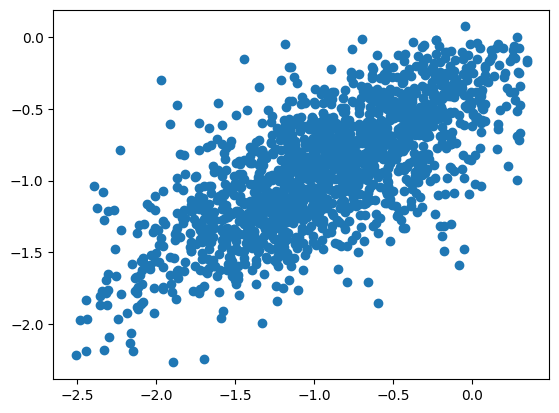

In [57]:
plt.plot(y_test, y_pred, 'o')

In [58]:
#XGBoost
model = XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [59]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Squared Error: 0.16405427999726852
R2 Score: 0.49402003404908224


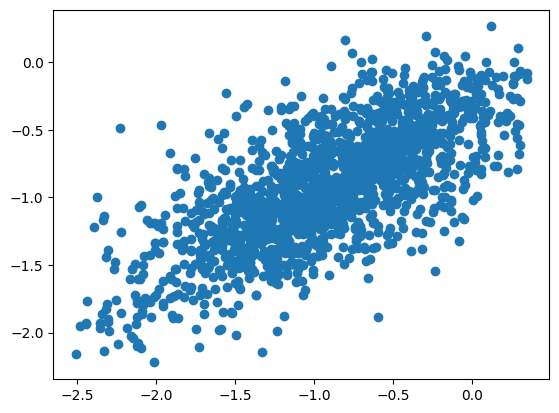

In [60]:
plt.plot(y_test, y_pred, 'o')

In [61]:
#Linear Regression
logit = LinearRegression()
logit.fit(X_train, y_train)
y_pred = logit.predict(X_test)

In [62]:
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Squared Error: 0.2280247738349581
R2 Score: 0.2967207725217603


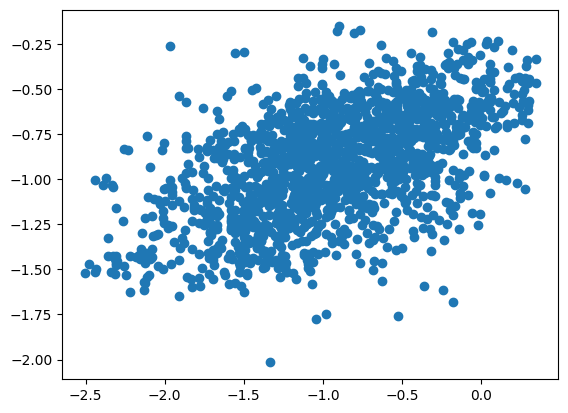

In [63]:
plt.plot(y_test, y_pred, 'o')

In [68]:
NN_model = Sequential()
NN_model.add(Dense(192, input_dim=X_train.shape[1], activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(192, activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(192, activation='relu'))
NN_model.add(Dropout(0.2))
NN_model.add(Dense(1, activation='linear'))
NN_model.compile(optimizer =Adam(learning_rate=0.001), loss = 'mse')

In [69]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
callbacks = [ModelCheckpoint(filepath='best_model.keras', monitor='val_loss', save_best_only=True),EarlyStopping(monitor='val_loss', patience=10)]

In [70]:
history = NN_model.fit(X_train, y_train, epochs=100, validation_split=0.2, callbacks=callbacks, batch_size=32)

Epoch 1/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 0.2279 - val_loss: 0.1090
Epoch 2/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.1232 - val_loss: 0.1061
Epoch 3/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1196 - val_loss: 0.1360
Epoch 4/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1078 - val_loss: 0.1076
Epoch 5/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1054 - val_loss: 0.1043
Epoch 6/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.1021 - val_loss: 0.1157
Epoch 7/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0960 - val_loss: 0.1117
Epoch 8/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0963 - val_loss: 0.1073
Epoch 9/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0928 - val_loss: 0.1182
Epoch 10/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0947 - val_loss: 0.0985
Epoch 11/100
187/187 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0955 - val_loss: 0.1003
Epoch 12/100
187/187 ━━━━━━━━━━━━━━━━━━━

Best validation loss: 0.08208929747343063 38


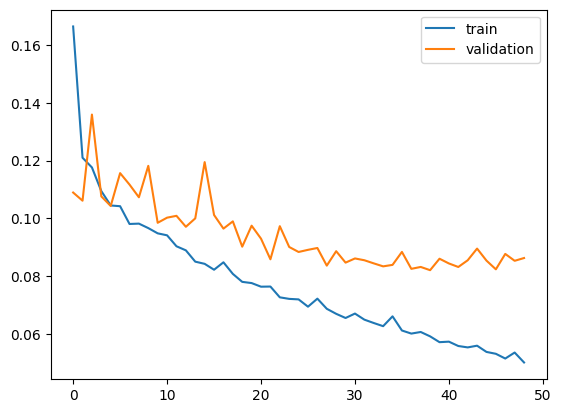

In [71]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
print('Best validation loss:', np.min(history.history['val_loss']), np.argmin(history.history['val_loss']))
plt.legend()
plt.show()

In [72]:
NN_model.load_weights('best_model.keras')

In [73]:
y_pred = NN_model.predict(X_test)

50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step


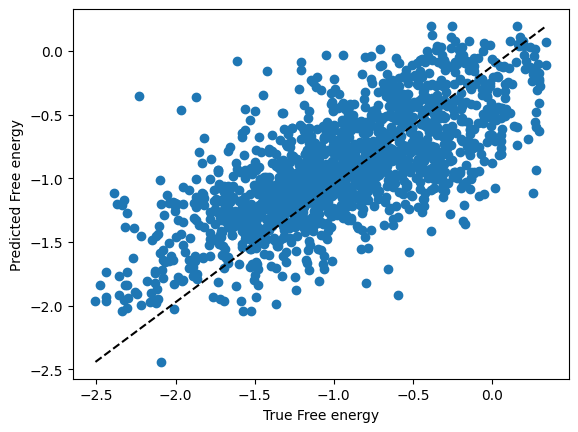

In [74]:
plt.plot(y_test, y_pred, 'o')
plt.xlabel('True Free energy')
plt.ylabel('Predicted Free energy')
plt.plot([np.min(y_test), np.max(y_test)], [np.min(y_pred), np.max(y_pred)], 'k--')

In [75]:
from sklearn import metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R2 Score:', metrics.r2_score(y_test, y_pred))

Mean Squared Error: 0.16533859555750535
R2 Score: 0.49005891859723494
